# **Look Through the Amazon product metadata and extracts ASINs**

In [0]:
import pandas as pd
import pickle
import json

In [0]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks/APRD6343_NEW/meta_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Extracting ASINS by brand
# only going to print our count every 100k
count = 0
# initiate dictionaries before we use
allproducts = {}
# Each line here is a product and its metadata
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)
  aproduct = eval(aline)
# Making a dictionary entry with the ASIN of the product as the key
  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
len(allproducts)

1503384

In [0]:
# Explore the product data to see what categories are commom in the data
# Find a list of product ids
allcategories = {}
count = 0

for aproduct in allproducts:
   count += 1
   if count % 100000 == 0:
     print (count/len(allproducts))

# Setting a dict up with just one product
   aproduct = allproducts[aproduct]
# Creating a dictionary entry for each product category also counting the occurances of each category
   if 'categories' in aproduct:
      for categories in aproduct['categories']:
       for acategory in categories:
        if acategory in allcategories:
          allcategories[acategory] += 1
        if acategory not in allcategories:
          allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
allproducts['B004RKJGCW']

{'asin': 'B004RKJGCW',
 'categories': [['Sports & Outdoors', 'Clothing', 'Men', 'Underwear'],
  ['Clothing, Shoes & Jewelry', 'adidas'],
  ['Clothing, Shoes & Jewelry',
   'Men',
   'Clothing',
   'Active',
   'Active Underwear'],
  ['Clothing, Shoes & Jewelry', 'Men', 'Big & Tall']],
 'imUrl': 'http://ecx.images-amazon.com/images/I/31EbcLX%2B7UL._SY445_.jpg',
 'related': {'also_bought': ['B00DUTT3WE',
   'B0083RLEPC',
   'B0038A1AEY',
   'B001M0MN16',
   'B004RKJAXC',
   'B004RKJQRC',
   'B002GYVFSY',
   'B006LHMA1S',
   'B006LHMADG',
   'B00AKSBSQW',
   'B004RKJFUK',
   'B00FFY8PZS',
   'B00DUTT3W4',
   'B00DUTT3U6',
   'B0073GO3CA',
   'B00ACIFJEW',
   'B00DUTT60I',
   'B001QMDCR4',
   'B00BP2VOAC',
   'B00ISRBXJY',
   'B007TCKAG6',
   'B00BAW86XK',
   'B00AAETM8M',
   'B0056DJWAA',
   'B00FFY8R24',
   'B00574M4SK',
   'B0057DPSQG',
   'B00CDJGVHC',
   'B00BAXCJ1O',
   'B005LTA2I0',
   'B004LQ16DE',
   'B006LHM9P0',
   'B003B3JQTY',
   'B006ZSYQOW',
   'B008SA1MBA',
   'B0051U15IA',

In [0]:
allcategories['adidas']

8645

In [0]:
sortedlist = []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory],acategory)) 
sortedlist = sorted (sortedlist, reverse=True)
for item in range (200,300):
  print(sortedlist[item])

(4988, 'Columbia')
(4895, 'Nautica')
(4849, 'Boutique Designer Jewelry')
(4705, 'Cold Weather Gloves')
(4701, 'Sports Sunglasses')
(4604, 'O')
(4594, 'Suits & Sport Coats')
(4593, 'Steve Madden')
(4562, 'Military')
(4468, 'Rain')
(4462, 'Watch Accessories')
(4457, 'Work & Safety')
(4398, 'Wedding Party Gifts')
(4385, 'W')
(4243, 'Snow Boots')
(4237, 'Nightgowns & Sleepshirts')
(4185, 'Brooches & Pins')
(4181, 'Lucky Brand')
(4171, 'Engagement Rings')
(4100, 'Barbells')
(4072, 'Boxer Briefs')
(4037, 'Vests')
(4036, 'Kenneth Cole REACTION')
(4027, 'Fitness & Cross-Training')
(4014, 'Heart-Shaped Jewelry')
(3980, 'Exercise & Fitness')
(3974, 'Charms & Charm Bracelets')
(3965, 'Motorcycle')
(3955, 'I')
(3953, 'Statement')
(3904, 'Kenneth Cole New York')
(3899, 'Timberland')
(3848, 'Merrell')
(3812, "Kids' Backpacks")
(3790, 'Travel Accessories')
(3760, 'Hiking Shoes')
(3725, 'Messenger Bags')
(3678, 'Western')
(3657, 'FOSSIL')
(3633, 'Tommy Hilfiger')
(3633, 'Footies & Rompers')
(3604, 'Me

In [0]:
for i in range(len(sortedlist)):
  if sortedlist[i][1] == 'adidas':
    print (sortedlist[i])

(8645, 'adidas')


In [0]:
alladidasasins = set()
count = 0
for areview in allproducts:
  theproduct = allproducts[areview]
  count += 1
  if count % 100000 == 0:
    print (count/1503384)
  for categories in theproduct['categories']:
    for acategory in categories:
      if 'adidas' in acategory.lower():
        alladidasasins.add(theproduct['asin'])

print(len(alladidasasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
9457


In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasasins2.txt','w')
outputfile.write(','.join(alladidasasins))
outputfile.close()

# **By Sales Rank**

In [0]:
## We choose a set here becuase we don't wnat duplicates
# alladidasasins = set()
alladidasasins = {}
count = 0
from time import sleep

for areview in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/1503384)

  theproduct = allproducts[areview]
  # alladidasasins[areview] ={}
  if 'salesRank' in theproduct:
    for categories in theproduct['categories']:
      for acategory in categories:
        if 'adidas' in acategory.lower():
          for acategory in theproduct['salesRank']:
            alladidasasins[areview] = theproduct['salesRank'][acategory]
            # print(areview, acategory, theproduct['salesRank'][acategory])

# alladidasasins.add(theproduct['asin'])
print(len(alladidasasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
9218


In [0]:
unsortedsalesrank = []
for aproduct in alladidasasins:
  unsortedsalesrank.append((alladidasasins[aproduct], aproduct))

unsortedsalesrank[0]

(435275, 'B000071JZK')

In [0]:
# sort salesRank
sortedsalesrank= sorted(unsortedsalesrank)
sortedsalesrank[0:10]

[(13, 'B004RKJGCW'),
 (13, 'B004RKJGLS'),
 (13, 'B004RKJGTK'),
 (13, 'B004RKJGZO'),
 (13, 'B004RKJI6G'),
 (13, 'B004RKJIFM'),
 (13, 'B004RKJIMU'),
 (13, 'B004RKJIQ6'),
 (13, 'B004RKJIXE'),
 (13, 'B004RKJJ3S')]

In [0]:
# plot
sortedsalesrank= sorted(unsortedsalesrank)
top100products = sortedsalesrank[0:100]

salesrank = []
for aproduct in sortedsalesrank:
  salesrank.append(aproduct[0])

print(salesrank[0:10])

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13]


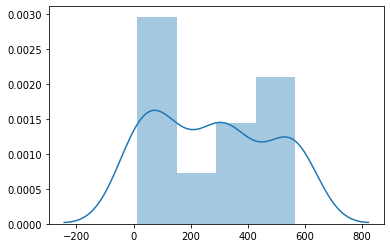

In [0]:
import numpy as np
import seaborn as sns
ax = sns.distplot(salesrank[0:100])

In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasasins2.txt','w')
outputfile.write(','.join(alladidasasins))
outputfile.close()

# **Extracts the review for adidas brand**

In [0]:
import pickle
import json

In [0]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks/APRD6343_NEW/reviews_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Step 2 - Phrsing the review data
#Loading the review data into a dictionary
count = 0
allreviews = {}
for aline in loadedjson:
  count += 1
  if count%100000 == 0:
    print(count)
  areview = eval(aline)
  allreviews[count] = areview

print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
allreviews[1]

{'asin': '0000031887',
 'helpful': [0, 0],
 'overall': 5.0,
 'reviewText': 'Perfect red tutu for the price. I baught it as part of my daughters Halloween costume and it looked great on her.',
 'reviewTime': '11 4, 2013',
 'reviewerID': 'A2XVJBSRI3SWDI',
 'reviewerName': 'abigail',
 'summary': 'Nice tutu',
 'unixReviewTime': 1383523200}

In [0]:
#pick out the reviews that correspond to the matching ASINs
from time import sleep

alladidasasins = []
for data in open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasasins2.txt','r'):
 asins = data.split(',')
 for anasin in asins:
   alladidasasins.append(anasin)

print(alladidasasins)

['B000071JZK', 'B0000727P4', 'B000074Z75', 'B00007498E', 'B000074FCW', 'B00007GDIR', 'B000086PVY', 'B00008XNMS', 'B00009PO1X', 'B00009V195', 'B0000A889O', 'B0000A62I5', 'B0000A8QKI', 'B0000AF46V', 'B0000AS8DL', 'B0000ASIXE', 'B0000DDQD7', 'B0000ERYHJ', 'B0000ERYI9', 'B00015LGSE', 'B0001FSB6Y', 'B0001M48GY', 'B000214PQM', 'B000214PWG', 'B0002HB22G', 'B0002K03I2', 'B00069V8VK', 'B00069VDRO', 'B0006H2GM2', 'B0006MRBXQ', 'B000787LDY', 'B0007CZNYE', 'B0007LYN5A', 'B0007PN8EI', 'B0007PNCBC', 'B0007PN898', 'B0007PN6FO', 'B0007PN6E0', 'B0007PN6FE', 'B0007PNA78', 'B0007PNA0K', 'B0007PNA00', 'B0007PN9YC', 'B0007PNCKS', 'B0007PNAWI', 'B0007PNA6O', 'B0007PNAXC', 'B0007PNA0A', 'B0007PN9ZQ', 'B0007PNAHI', 'B0007PN6FY', 'B0007PN9ZG', 'B0007PNAZK', 'B0007PN6F4', 'B0007PNAH8', 'B0007PN9Y2', 'B0007PNA28', 'B0007PNDDE', 'B0007PNA3C', 'B0007PN9XI', 'B0007PN9YM', 'B0007PN762', 'B0007PN9Z6', 'B0007PN76M', 'B0007PNAE6', 'B0007PN9YW', 'B0007PNAHS', 'B0007PND0W', 'B0007Q3XHO', 'B0007QCNGG', 'B0007QCPP0', 'B000

In [0]:
print(len(alladidasasins))

9218


In [0]:
adidasreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
    print(count/5748920)
#setting current review as a dictionary,so we can easily reference its entries 
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if thereview['asin'] in alladidasasins:
#setting the key as sth unique, if we just did by asin,we only have one review for each asin,last one is only one being store    
    thekey = '%s.%s' % (theasin,reviewerid)
    adidasreviews[thekey] = thereview

print(len(adidasreviews))

0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


In [0]:
#save as new json file
json.dump(adidasreviews, open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasreviews2.json','w'))

In [0]:
#load
alladidasreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD6343_NEW/adidasreviews2.json','r'))
#check its working or not
alladidasreviews

{'B000071JZK.A3SW93SXD720ER': {'asin': 'B000071JZK',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "A great shoe. Doesn't show off a lot. Really comfortable, and never out of style",
  'reviewTime': '01 8, 2005',
  'reviewerID': 'A3SW93SXD720ER',
  'reviewerName': 'Average Joe "John Hancock"',
  'summary': 'The Adidas Superstar I',
  'unixReviewTime': 1105142400},
 'B000071JZK.A29Y0F0ZEWAVZW': {'asin': 'B000071JZK',
  'helpful': [1, 1],
  'overall': 5.0,
  'reviewText': "I have 4 pairs of these shoes and I love them to death!  They are as close to indestructable as any shoe I've ever owned.  Then you're probably asking why I have so many.  Well, the answer is that this is the only shoe I know of that comes in so many colors (I've seen at least 7 or 8 colors) and works with just about everything in your wardrobe!  Jeans, khakis, whatever- they work, and I love 'em!!!",
  'reviewTime': '12 12, 2002',
  'reviewerID': 'A29Y0F0ZEWAVZW',
  'reviewerName': '"frankiepmcg"',
  'summary